In [1]:
# 필요한 라이브러리 호출

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns # 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

# 파일 위치 확인 (맥북 파일경로 복사 : command + option + c)
import os
print(os.listdir("/Users/bumchanpark/Desktop/MachineLearning_Study/AiffelResearch/data"))

['.DS_Store', 'sampleSubmission.csv', 'test.csv', 'train.csv']


In [2]:
# 1) 훈련, 테스트 데이터셋의 개괄적인 형태 및 데이터의 컬럼의 속성 및 값의 개수 파악

# train, test 데이터셋을 불러온다
train = pd.read_csv('/Users/bumchanpark/Desktop/MachineLearning_Study/AiffelResearch/data/train.csv')
test = pd.read_csv('/Users/bumchanpark/Desktop/MachineLearning_Study/AiffelResearch/data/test.csv')

In [3]:
# .head() : train 데이터의 가장 앞의 5개의 데이터를 불러온다
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# test 데이터의 가장 앞의 5개의 데이터를 불러온다
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
"""
datetime - 시간별 날짜 + 타임스탬프
season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
holiday - 해당 요일이 휴일인지 여부
workingday - 해당 요일이 주말 or 휴일이 아닌지 여부
weather - 1: 맑음, 구름 조금, 구름 조금, 구름 조금
2: 안개 + 흐림, 안개 + 구름 조금, 안개 + 구름 조금, 안개
3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름
4: 폭우 + 유빙판 + 뇌우 + 안개, 눈 + 안개
temp - 섭씨 온도
atemp - 체감 온도(섭씨)
humidity - 상대 습도
windspeed - 풍속
casual - 미등록 사용자 대여 시작 횟수
registered - 등록된 사용자 대여 시작 횟수
count - 총 대여 횟수
"""

# 훈련 데이터셋의 각 컬럼별 데이터타입 및 값의 갯수 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# 2) 데이터 전처리 및 시각화

# datetime 속성을 분리하여 추출 속성으로 활용하기 위해 split함수를 사용하여 년-월-일 과 시간을 분리한다
# split() : 공백을 나눠서 리스트로 변환
train['tempDate'] = train.datetime.apply(lambda x:x.split())

print(train['tempDate'])

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: tempDate, Length: 10886, dtype: object


In [7]:
# 분리한 tempDate를 가지고 년-월-일을 이용하여 year,month,day 그리고 weekday column을 추출한다.

train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])

# .calendar.day_name[] : 요일 이름 리스트에서 숫자 인덱스로 요일을 나누기
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [8]:
# 분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음

train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour,errors='coerce')

In [9]:
# year,month,day,hour가 숫자형으로 변환되었음을 알 수 있음
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [10]:
# 필요를 다한 tempDate column을 삭제함
train = train.drop('tempDate',axis=1)

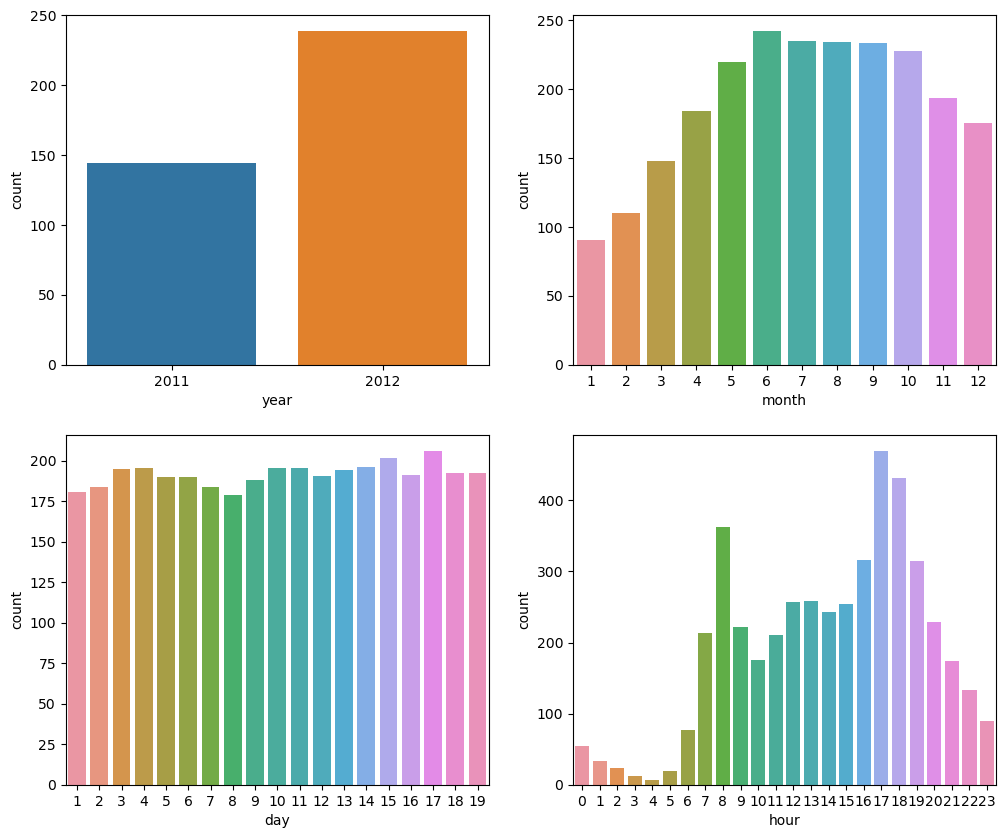

In [11]:
# 각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악
# fig.add_subplot(2, 2, n) : 2행 2열짜리 그래프 형태에서 n번째 칸에 그래프를 그린다

# 년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index())

# month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index())

# day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index())

# hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index())

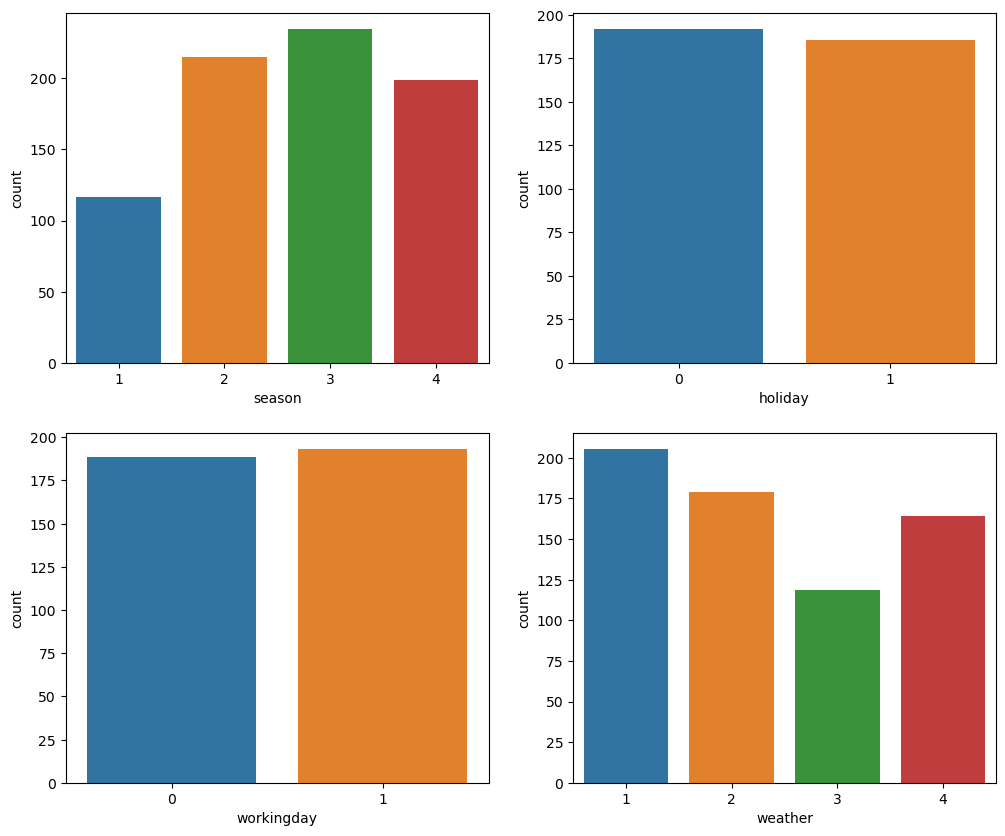

In [12]:
# 계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

# 휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

# 작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

# 날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [13]:
"""
해당 부분은 필자가 스스로 데이터를 보고 이상함을 느껴 전처리함
왜냐하면, 처음 import한 데이터 셋에서 head()를 하였을 때 1월 1일의 season column은 1, 봄을 가르키는데
따라서 아래의 badToRight를 이용하여 season column을 수정하고자 했음
이 데이터 때문에 참조했던 커널과는 다른 정확도를 나타낼 수 있음
"""

def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

# apply() 내장함수는 split(), map(), join(), filter()등 과 함께 필수적으로 숙지해야 할 함수
train['season'] = train.month.apply(badToRight)

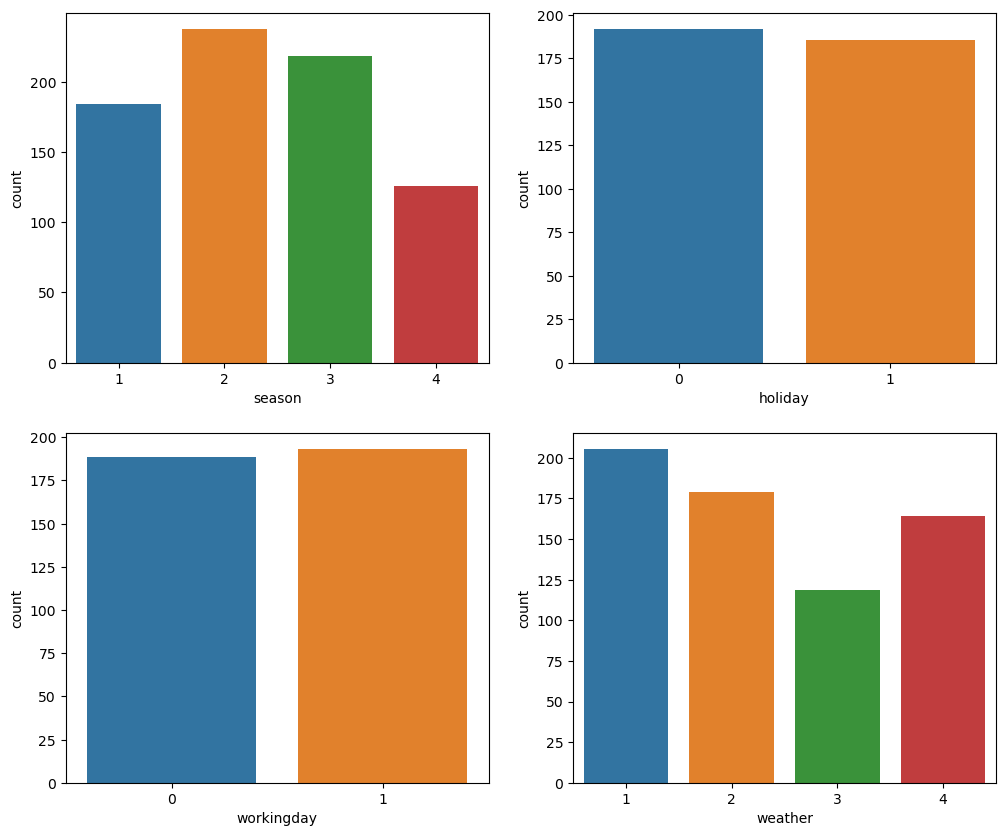

In [14]:
# 위의 시각화와 같이 하나의 컬럼과 결과 값을 비교해보자

# 계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

# 휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

# 작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

# 날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

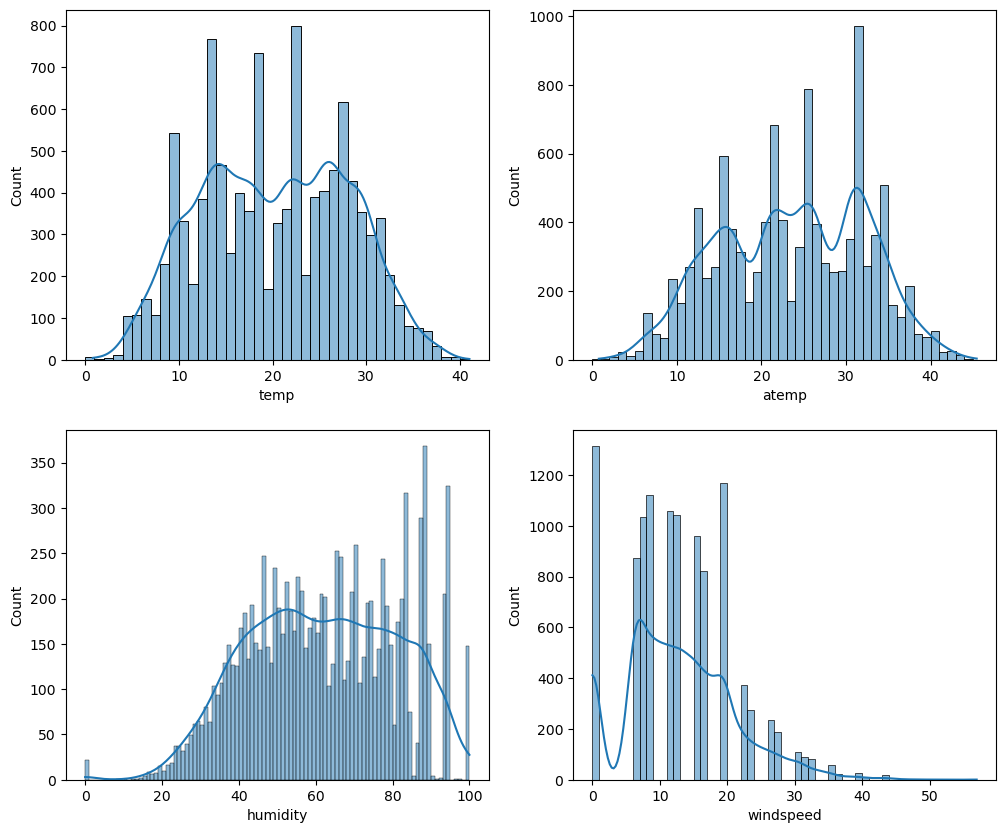

In [15]:
# 그리고 남은 분포를 통해 표현하였을 때 좋은 컬럼들을 count와 비교해보자

# 온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.histplot(train.temp, bins=range(int(train.temp.min()), int(train.temp.max())+1), kde=True)

# 평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.histplot(train.atemp, bins=range(int(train.atemp.min()), int(train.atemp.max())+1), kde=True)

# 습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.histplot(train.humidity, bins=range(int(train.humidity.min()), int(train.humidity.max())+1), kde=True)

# 바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.histplot(train.windspeed, bins=range(int(train.windspeed.min()), int(train.windspeed.max())+1), kde=True)

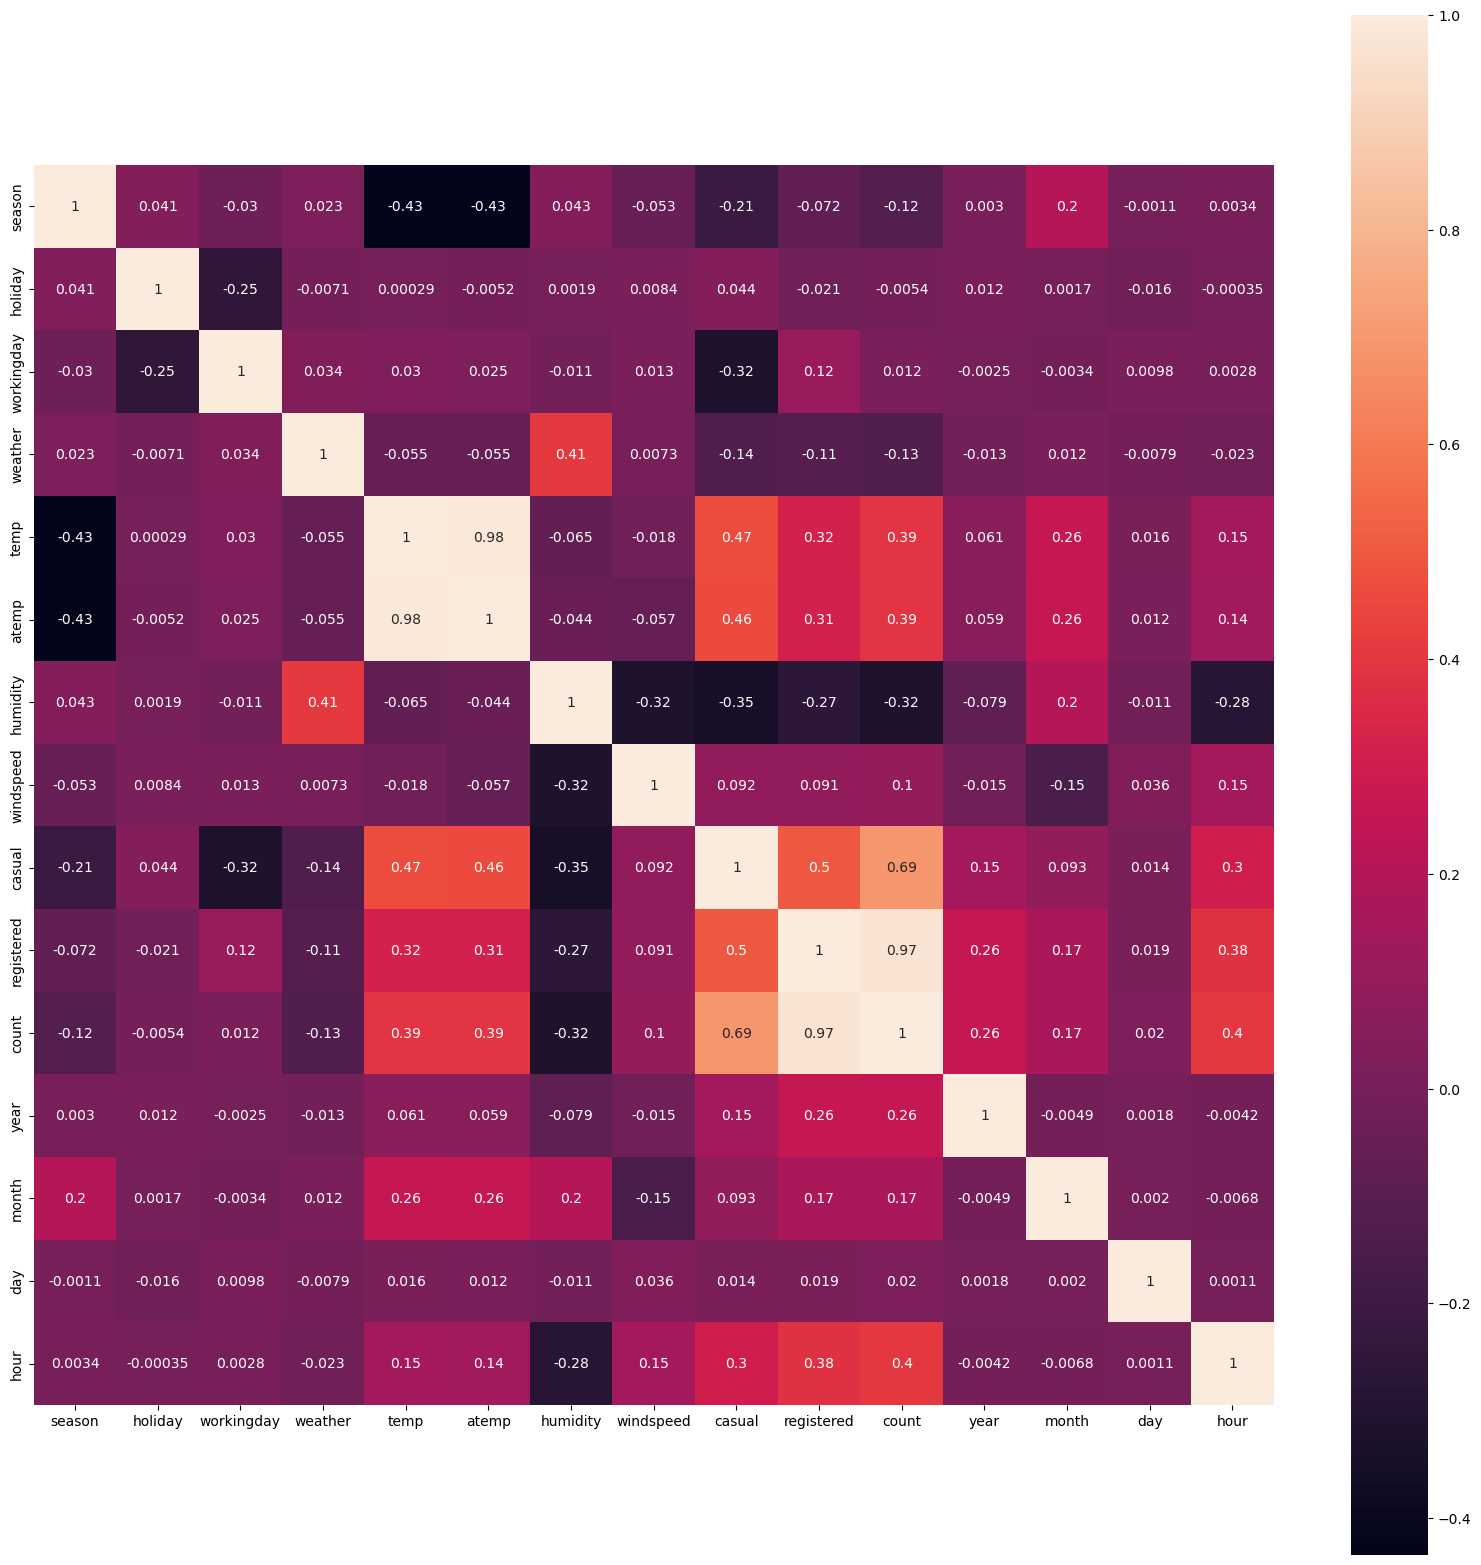

In [16]:
# 각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

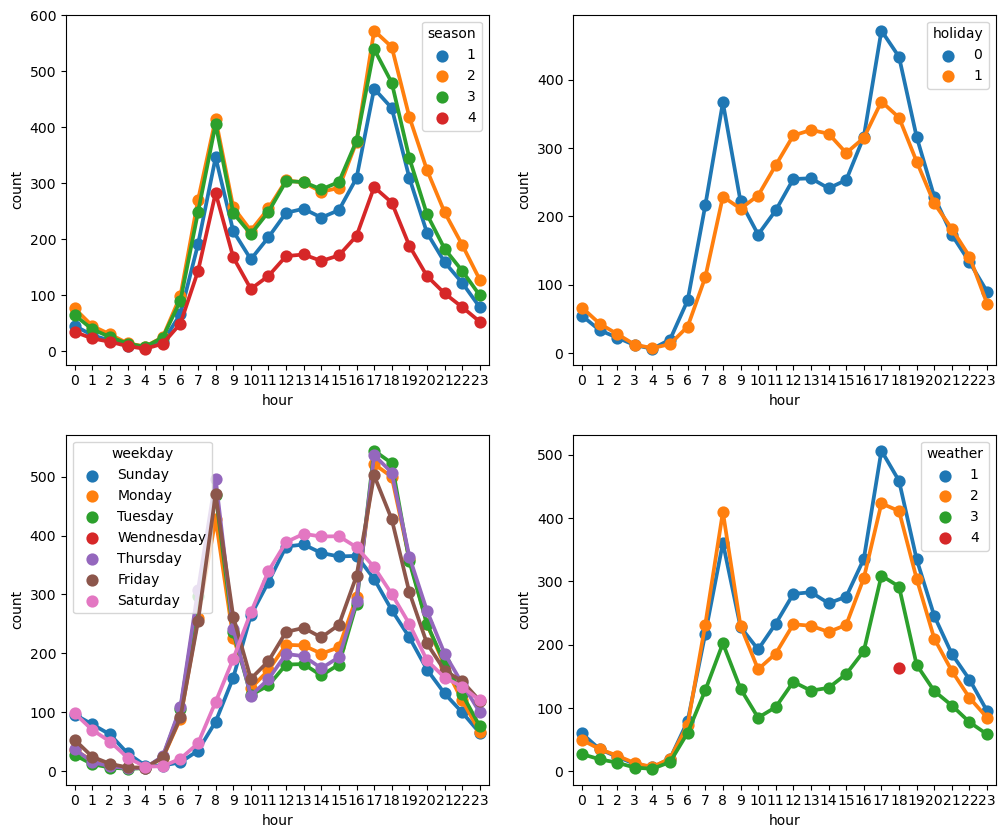

In [17]:
# heatmap 상관관계를 참조하여 이전의 시각화와는 달리 두 개의 서로다른 컬럼이 적용된 count를 시각화

# 시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

# 시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

# 시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

# 시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [18]:
# 날씨 시각화의 4에 이상치가 있는 것 같아서 확인

train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


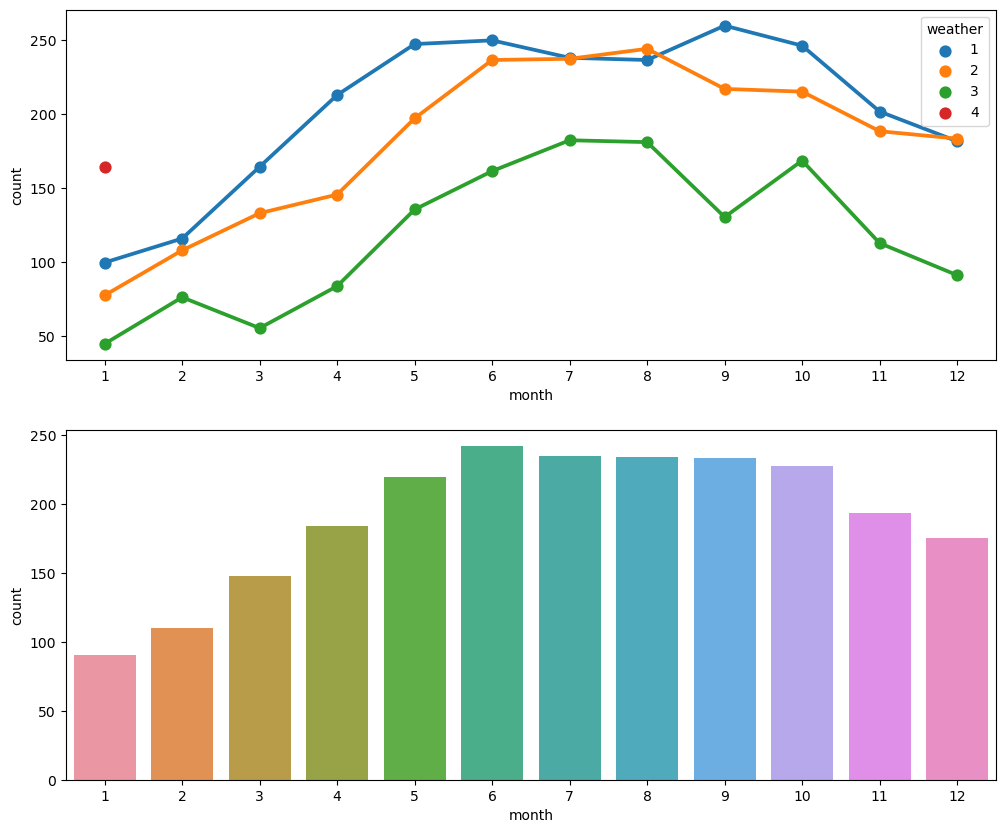

In [19]:
# 달과 날씨에 따른 count 
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())

# 달 별 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

In [20]:
"""
Windspeed 분포를 표현한 그래프에서 Windspeed가 0인 값들이 많았는데,
이는 실제로 0이었던지 or 값을 제대로 측정하지 못해서 0인지 두 개의 경우가 있다
하지만 후자의 생각을 가지고 우리의 데이터를 활용하여 windspeed값을 부여
"""

# 머신러닝 모델에 훈련시킬 때는 문자열 값은 불가능하기 때문에 문자열을 카테고리화 하고 각각에 해당하는 값을 숫자로 변환
train['weekday']= train.weekday.astype('category')

print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [21]:
# 0 : Sunday > 6 : Saturday
train.weekday.cat.categories = ['5','1','6','0','4','2','3']

In [22]:
"""
RandomForest를 활용하여 Windspeed값을 부여하기!

하나의 데이터를 Windspeed가 0인 그리고 0이 아닌 데이터프레임으로 분리하고
학습시킬 0이 아닌 데이터 프레임에서는 Windspeed만 담긴 Series와 이외의 학습시킬 column들의 데이터프레임으로 분리한다
학습 시킨 후에 Windspeed가 0인 데이터 프레임에서 학습시킨 컬럼과 같게 추출하여 결과 값을 부여받은 후
Windspeed가 0인 데이터프레임에 Windspeed값을 부여한다
"""

from sklearn.ensemble import RandomForestRegressor

# Windspeed가 0인 데이터프레임
windspeed_0 = train[train.windspeed == 0]

# Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = train[train.windspeed != 0]

# Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

# Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

# 모델에 0이 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)

# 학습된 모델에 Windspeed가 0인 데이터프레임의 Windspeed를 도출
predicted_windspeed_0 = rf.predict(windspeed_0_df)

# 도출된 값을 원래의 데이터프레임에 삽입
windspeed_0['windspeed'] = predicted_windspeed_0

In [23]:
# 나눈 데이터 프레임을 원래의 형태로 복원
train = pd.concat([windspeed_0,windspeed_Not0],axis=0)

# 시간별 정렬을 위해 string type의 datetime을 datetime으로 변환
train.datetime = pd.to_datetime(train.datetime,errors='coerce')

# 합쳐진 데이터를 datetime순으로 정렬
train = train.sort_values(by=['datetime'])

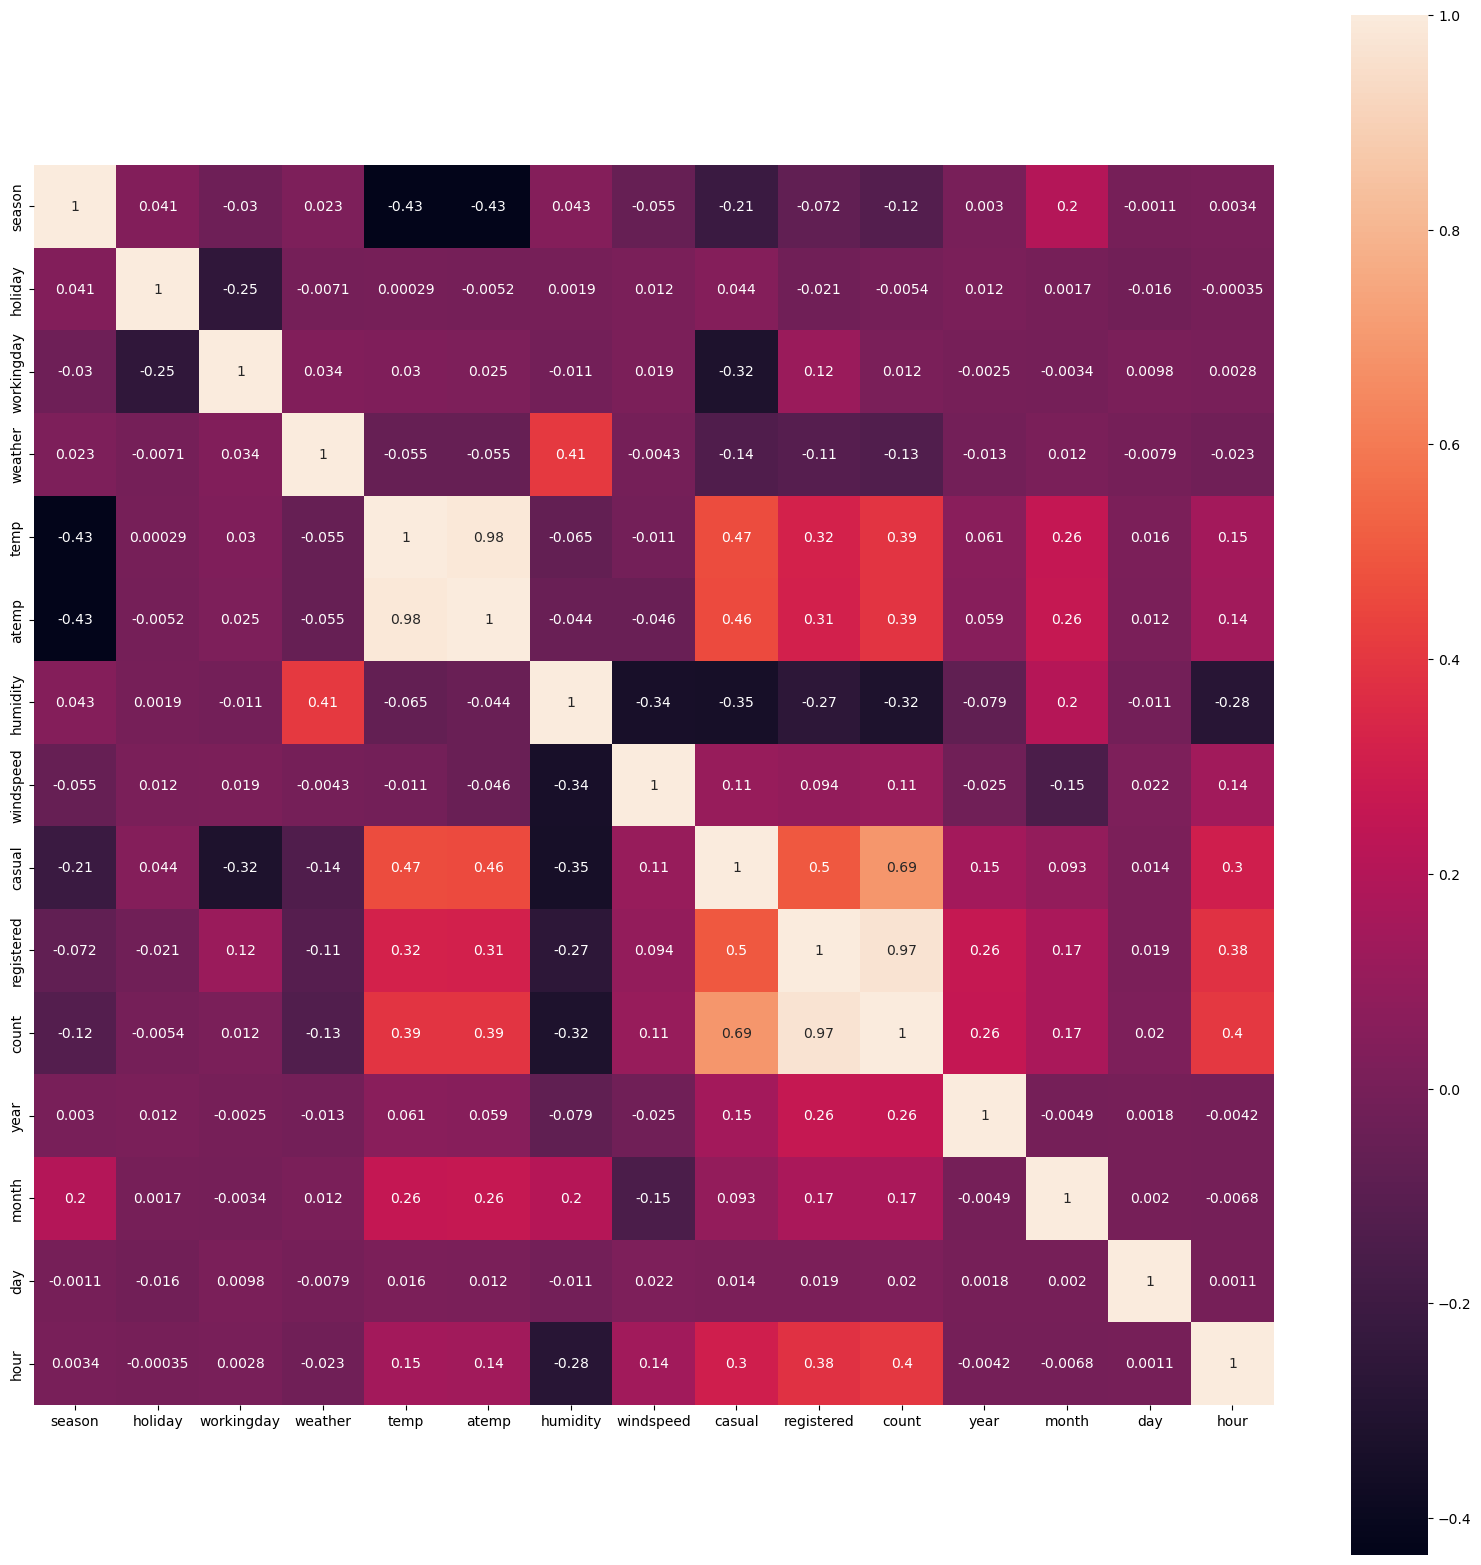

In [24]:
# windspeed를 수정한 후 다시 상관계수를 분석
# 우리의 기대와는 달리 windspeed와 count의 상관관계는 0.1에서 0.11로 간소한 차이만 보인다 

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

Min value of windspeed is 6.0032


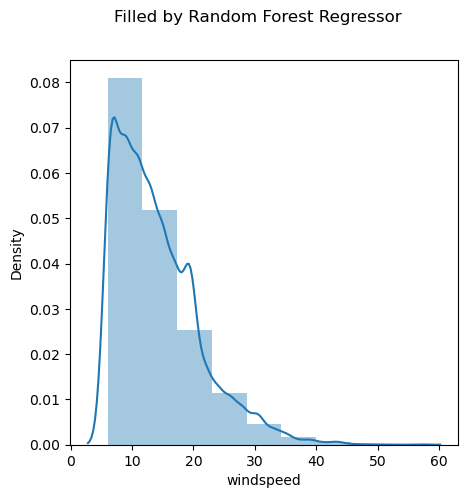

In [25]:
fig = plt.figure(figsize=[5,5])
sns.distplot(train['windspeed'],bins=np.linspace(train['windspeed'].min(),train['windspeed'].max(),10))
plt.suptitle("Filled by Random Forest Regressor")

print("Min value of windspeed is {}".format(train['windspeed'].min()))

In [26]:
# 이제 모든 동일한 전처리 과정을 test셋과 한꺼번에 진행

train = pd.read_csv('/Users/bumchanpark/Desktop/MachineLearning_Study/AiffelResearch/data/train.csv')
test = pd.read_csv('/Users/bumchanpark/Desktop/MachineLearning_Study/AiffelResearch/data/test.csv')

In [27]:
combine = pd.concat([train,test],axis=0)

combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [28]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

combine['year'] = pd.to_numeric(combine.year,errors='coerce')
combine['month'] = pd.to_numeric(combine.month,errors='coerce')
combine['day'] = pd.to_numeric(combine.day,errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour,errors='coerce')

In [29]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  tempDate    17379 non-null  object 
 13  weekday     17379 non-null  object 
 14  year        17379 non-null  int64  
 15  month       17379 non-null  int64  
 16  day         17379 non-null  int64  
 17  hour        17379 non-null  int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 2.5+ MB


In [30]:
combine['season'] = combine.month.apply(badToRight)
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4


In [31]:
combine.weekday = combine.weekday.astype('category')

In [32]:
combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

In [33]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [34]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [35]:
dataWind0_df = dataWind0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)

dataWindNot0_df = dataWindNot0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)
dataWindNot0_series = dataWindNot0['windspeed']

In [36]:
dataWindNot0_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,weekday,year,month,day,hour
5,4,0,0,2,9.84,12.880,75,6,2011,1,1,5
10,4,0,0,1,15.58,19.695,76,6,2011,1,1,10
11,4,0,0,1,14.76,16.665,81,6,2011,1,1,11
12,4,0,0,1,17.22,21.210,77,6,2011,1,1,12
13,4,0,0,2,18.86,22.725,72,6,2011,1,1,13


In [37]:
dataWind0_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,weekday,year,month,day,hour
0,4,0,0,1,9.84,14.395,81,6,2011,1,1,0
1,4,0,0,1,9.02,13.635,80,6,2011,1,1,1
2,4,0,0,1,9.02,13.635,80,6,2011,1,1,2
3,4,0,0,1,9.84,14.395,75,6,2011,1,1,3
4,4,0,0,1,9.84,14.395,75,6,2011,1,1,4


In [38]:
rf2 = RandomForestRegressor()
rf2.fit(dataWindNot0_df,dataWindNot0_series)
predicted = rf2.predict(dataWind0_df)
print(predicted)

[ 7.502057  7.032186  6.942205 ...  9.45169  24.950264  9.93074 ]


In [39]:
dataWind0['windspeed'] = predicted

In [40]:
combine = pd.concat([dataWind0,dataWindNot0],axis=0)

In [41]:
# 우리가 가진 column들 중 값들이 일정하고 정해져있다면 category로 변경해주고
# 필요하지 않은 column들은 버린다

categorizational_columns = ['holiday','humidity','season','weather','workingday','year','month','day','hour']
drop_columns = ['datetime','casual','registered','count','tempDate']

In [42]:
# categorical하게 변환

for col in categorizational_columns:
    combine[col] = combine[col].astype('category')

In [43]:
# 합쳐진 combine데이터 셋에서 count의 유무로 훈련과 테스트셋을 분리하고 각각을 datetime으로 정렬
train = combine[pd.notnull(combine['count'])].sort_values(by='datetime')
test = combine[~pd.notnull(combine['count'])].sort_values(by='datetime')

# 데이터 훈련시 집어 넣게 될 각각의 결과 값들
datetimecol = test['datetime']
yLabels = train['count'] #count
yLabelsRegistered = train['registered'] #등록된 사용자
yLabelsCasual = train['casual'] #임시 사용자

In [44]:
# 필요 없는 column들을 버린 후의 훈련과 테스트 셋

train = train.drop(drop_columns,axis=1)
test = test.drop(drop_columns,axis=1)

In [45]:
"""
해당 문제에서는 RMSLE방식을 이용하여 제대로 예측이 되었는지 평가하게 됨
RMSLE는 아래 링크를 참조하여 이용
https://programmers.co.kr/learn/courses/21/lessons/943#

RMSLE
과대평가 된 항목보다는 과소평가 된 항목에 페널티를 주는 방식
오차를 제곱하여 형균한 값의 제곱근으로 값이 작아질 수록 정밀도가 높음
0에 가까운 값이 나올 수록 정밀도가 높다
"""

# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [46]:
print(type(train))
print(train[:5])  # 일부 데이터 확인


<class 'pandas.core.frame.DataFrame'>
  season holiday workingday weather  temp   atemp humidity  windspeed weekday  \
0      4       0          0       1  9.84  14.395       81   7.502057       6   
1      4       0          0       1  9.02  13.635       80   7.032186       6   
2      4       0          0       1  9.02  13.635       80   6.942205       6   
3      4       0          0       1  9.84  14.395       75   6.782276       6   
4      4       0          0       1  9.84  14.395       75   6.642447       6   

   year month day hour  
0  2011     1   1    0  
1  2011     1   1    1  
2  2011     1   1    2  
3  2011     1   1    3  
4  2011     1   1    4  


In [47]:
# 선형 회귀 모델
# 선형 회귀모델은 건드릴 만한 내부 attr들이 없음
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# np.array로 변환
train = np.array(train)
yLabels = np.array(yLabels)

# 1차원이면 reshape
if train.ndim == 1:
    train = train.reshape(-1, 1)
    
"""
아래의 커널을 참조하여 yLabels를 로그화 하려는데 왜 np.log가 아닌 np.log1p를 활용하는가??
np.log1p는 np.log(1+x)와 동일. 이유는 만약 어떤 x값이 0인데 이를 log하게되면, (-)무한대로 수렴하기 때문에 np.log1p를 활용함. 
참조: https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8 
"""

# 로그 변환
yLabelslog = np.log1p(yLabels)

# 선형 회귀 모델 학습
lr = LinearRegression()
lr.fit(train, yLabelslog)

# 예측값 도출
preds = lr.predict(train)

# RMSLE 계산 함수가 있다고 가정하고 출력
# rmsle함수의 element에 np.exp()지수 함수를 취하는 이유는
# 우리의 preds값에 얻어진 것은 한번 log를 한 값이기 때문에 원래 모델에는 log를 하지 않은 원래의 값을 넣기 위함
print('RMSLE Value For Linear Regression: {}'.format(rmsle(np.exp(yLabelslog), np.exp(preds), False)))

RMSLE Value For Linear Regression: 0.9773501885240425


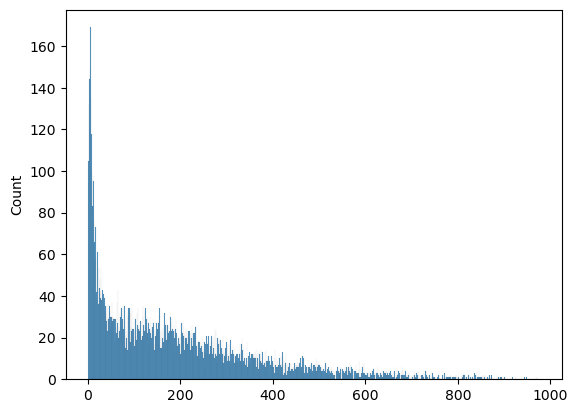

10886
10739


In [48]:
"""
데이터 훈련시 Log값을 취하는 이유 : 
우리가 결과 값으로 투입하는 Count값이 최저 값과 최고 값의 낙폭이 너무 크기 때문
만약 log를 취하지 않고 해보면 print하는 결과 값이 inf(infinity)로 뜨게 됨
"""

# yLabels가 numpy 배열인 경우
yLabels = pd.Series(yLabels)  # count() 메서드 사용 위해 Series로 변환

# count값의 분포 시각화
sns.histplot(yLabels, bins=range(int(yLabels.min()), int(yLabels.max())))  # distplot은 deprecated됨
plt.show()

""" 
3 sigma를 활용한 이상치 확인
참조 : https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99
"""
# 기존 훈련 데이터셋의 count의 개수
print(yLabels.count())  # 10886

# 3시그마를 적용한 이상치를 배제한 훈련 데이터셋의 count의 개수
filtered = yLabels[np.logical_and(
    yLabels >= yLabels.mean() - 3 * yLabels.std(),
    yLabels <= yLabels.mean() + 3 * yLabels.std()
)]
print(filtered.count())  # 10739 (예시)

In [49]:
"""
GridSearchCV를 활용하면 우리가 이용하게 될 각각의 모델마다 변경해야 하는 파라미터 튜닝시 어떤 파라미터가 최적의 값을 내는지 등을 알 수 있음.

GridSearchCV 참조:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://datascienceschool.net/view-notebook/ff4b5d491cc34f94aea04baca86fbef8/
"""
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Ridge모델은 L2제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값임
ridge = Ridge()

# 우리가 튜닝하고자하는 Ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면
# 테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

grid_ridge.fit(train,yLabelslog)
preds = grid_ridge.predict(train)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.9773501882776987


In [50]:
# 결과에 대해 GridSearchCV의 변수인 grid_ridge변수에 cv_result_를 통해
# alpha값의 변화에 따라 평균값의 변화를 파악 가능
df = pd.DataFrame(grid_ridge.cv_results_)

df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007336,0.001010,0.008147,0.002374,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-1.001786,-0.904118,-1.044003,-1.005233,-0.979783,-0.986985,0.046308,1
1,0.007740,0.004915,0.005433,0.002530,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.001786,-0.904118,-1.044004,-1.005233,-0.979783,-0.986985,0.046308,2
2,0.005629,0.001841,0.002207,0.001004,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.001787,-0.904118,-1.044005,-1.005233,-0.979784,-0.986985,0.046308,3
3,0.004056,0.001512,0.004695,0.003676,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.001801,-0.904117,-1.044024,-1.005228,-0.979786,-0.986991,0.046314,4
4,0.007371,0.002561,0.003937,0.001784,10,3000,"{'alpha': 10, 'max_iter': 3000}",-1.001936,-0.904108,-1.044205,-1.005182,-0.979816,-0.987049,0.046366,5


In [51]:
# Ridge모델은 L1제약을 가지는 선형회귀모델에서 개선된 모델이며
# 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다
lasso = Lasso()

lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
grid_lasso.fit(train,yLabelslog)
preds = grid_lasso.predict(train)
print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for Lasso Regression 0.9773597166602714


In [52]:
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(train,yLabelslog)
preds = grid_rf.predict(train)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for RandomForest 0.10305697081792445


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(train,yLabelslog)
preds = grid_gb.predict(train)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))


RMSLE Value for GradientBoosting 0.20499179524531186


<Axes: ylabel='Density'>

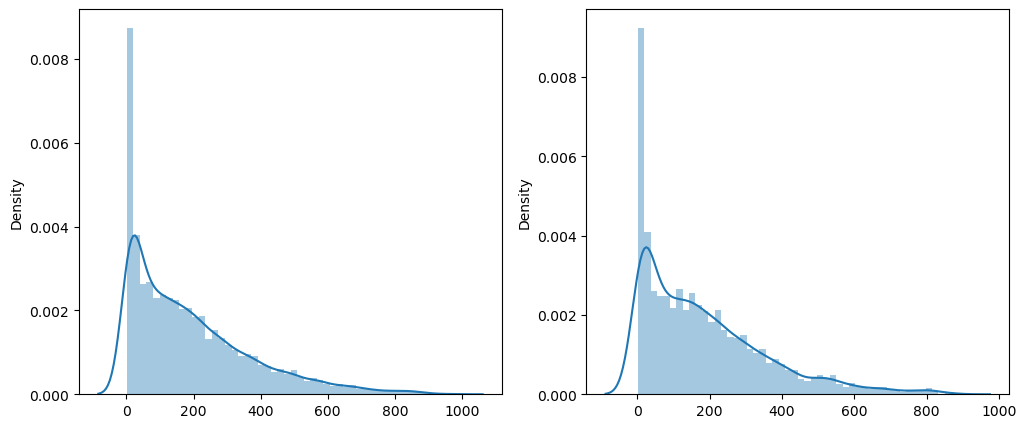

In [54]:
predsTest = grid_gb.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(yLabels,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [55]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })

# 자전거 수요 데이터 전처리 후 csv 파일 저장
submission.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)